In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller 

In [ ]:
# 1. Load and prepare data
df = pd.read_csv("river_data.csv", parse_dates=["TIME/DATE"])
df = df.set_index("TIME/DATE").sort_index()
series = df["RIVER LEVEL"].resample("H").mean().interpolate()


In [ ]:
# 2. Stationarity test
result = adfuller(series.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

In [ ]:
# 3. Fit SARIMA (example: SARIMA(1,1,1)(1,1,1,24) for daily cycle on hourly data)
model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,24))
results = model.fit(disp=False)

print(results.summary())


In [ ]:
# 4. Forecast
forecast = results.get_forecast(steps=48)  # predict next 48 hours
forecast_ci = forecast.conf_int()

In [ ]:
# 5. Plot
plt.figure(figsize=(12,6))
plt.plot(series[-200:], label="Observed")
plt.plot(forecast.predicted_mean, label="Forecast", color="red")
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1], color="pink", alpha=0.3)
plt.legend()
plt.show()

In [5]:
#test modling 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

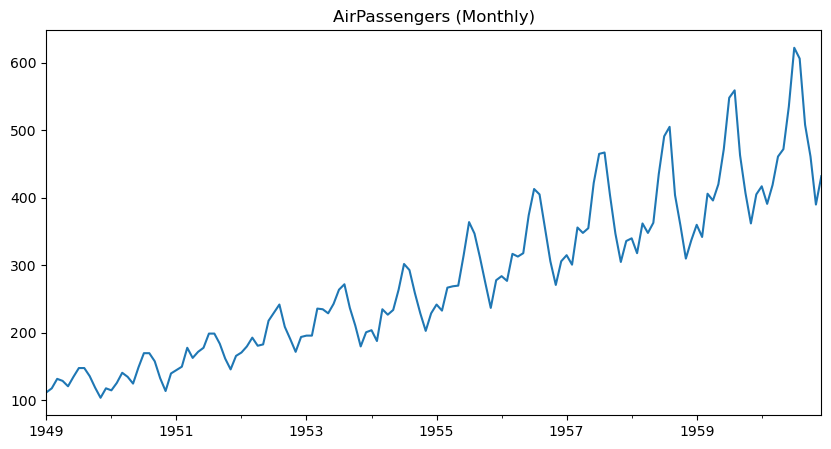

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52844D+00    |proj g|=  8.65844D-02

At iterate    5    f=  3.52337D+00    |proj g|=  3.73532D-02

At iterate   10    f=  3.51577D+00    |proj g|=  4.96149D-03

At iterate   15    f=  3.51498D+00    |proj g|=  1.97206D-03


 This problem is unconstrained.



At iterate   20    f=  3.51493D+00    |proj g|=  6.96728D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   3.616D-05   3.515D+00
  F =   3.5149263670446422     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Wed, 27 Aug 2025   AIC                           1022.2

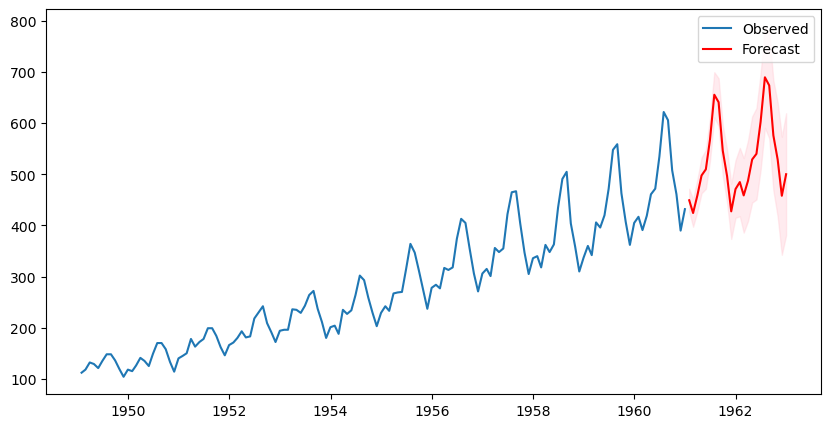

In [6]:
# Load dataset
data = get_rdataset("AirPassengers").data
data.index = pd.date_range(start="1949-01", periods=len(data), freq="M")
series = data["value"]

# Plot
series.plot(figsize=(10,5), title="AirPassengers (Monthly)")
plt.show()

# Fit SARIMA
model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

# Forecast next 24 months
forecast = results.get_forecast(steps=24)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10,5))
plt.plot(series, label="Observed")
plt.plot(forecast.predicted_mean, label="Forecast", color="red")
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1], color="pink", alpha=0.3)
plt.legend()
plt.show()